In [1]:
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy
import pandas as pd 
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy import stats as st

In [2]:
def PrintAttrData(attrName, data, n):
    print(attrName + ': min {:0.2f}, mode {}, mean {:0.2f}, median {:0.2f}, max {:0.2f}, count {:0.2f}, NaN count {:0.2f}'
          .format(numpy.min(data[:,n]), st.mode(data[:,n], keepdims = False).mode, numpy.mean(data[:,n]), 
                  numpy.median(data[:,n]), numpy.max(data[:,n]),
                  len(data[:,n]), numpy.count_nonzero(numpy.isnan(data[:,n]))))


In [ ]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

In [7]:
PrintAttrData('sepal length', data, 0)    
PrintAttrData('sepal width', data, 1)    
PrintAttrData('petal length', data, 2)    
PrintAttrData('petal width', data, 3)    

print('Class distribution: Iris Setosa {}, Iris Versicolour {}, Iris Virginica {}'
      .format(len(data[target == 0]), len(data[target == 1]), len(data[target == 2]))
     )
     

sepal length: min 4.30, mode 5.0, mean 5.84, median 5.80, max 7.90, count 150.00, NaN count 0.00
sepal width: min 2.00, mode 3.0, mean 3.06, median 3.00, max 4.40, count 150.00, NaN count 0.00
petal length: min 1.00, mode 1.4, mean 3.76, median 4.35, max 6.90, count 150.00, NaN count 0.00
petal width: min 0.10, mode 0.2, mean 1.20, median 1.30, max 2.50, count 150.00, NaN count 0.00
Class distribution: Iris Setosa 50, Iris Versicolour 50, Iris Virginica 50


([], [])

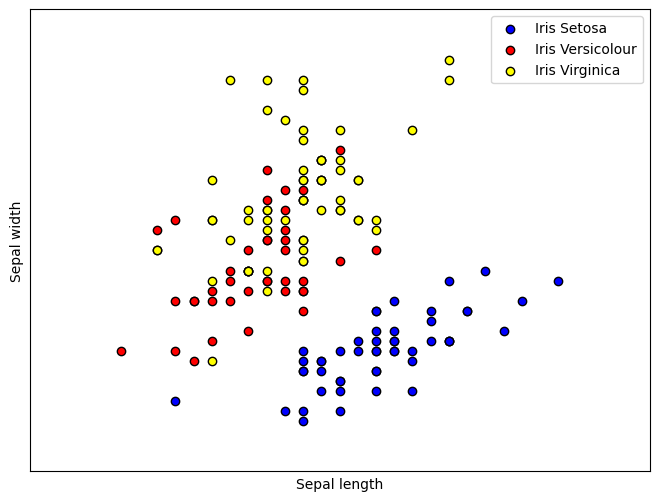

In [8]:
iris = datasets.load_iris()
X = iris.data [:, :2]  # we only take the first two features.
y = iris.target

# for fabulous graph
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()


plt.scatter(X[y == 0, 1], X[y == 0, 0], color='blue', edgecolor="k", label='Iris Setosa')
plt.scatter(X[y == 1, 1], X[y == 1, 0], color='red', edgecolor="k", label='Iris Versicolour')
plt.scatter(X[y == 2, 1], X[y == 2, 0], color='yellow', edgecolor="k", label='Iris Virginica')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

plt.ylim(x_min, x_max)
plt.xlim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [9]:
data_df = pd.DataFrame(data, columns=['sepal length', 'sepal width', 'pepal length', 'pepal width'])
names_df = pd.DataFrame(target, columns=['name'])
names_df[names_df == 0] = 'Iris Setosa'
names_df[names_df == 1] = 'Iris Versicolour'
names_df[names_df == 2] = 'Iris Virginica'
iris_df = data_df.join(names_df)
print(iris_df)

     sepal length  sepal width  pepal length  pepal width            name
0             5.1          3.5           1.4          0.2     Iris Setosa
1             4.9          3.0           1.4          0.2     Iris Setosa
2             4.7          3.2           1.3          0.2     Iris Setosa
3             4.6          3.1           1.5          0.2     Iris Setosa
4             5.0          3.6           1.4          0.2     Iris Setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris Virginica
146           6.3          2.5           5.0          1.9  Iris Virginica
147           6.5          3.0           5.2          2.0  Iris Virginica
148           6.2          3.4           5.4          2.3  Iris Virginica
149           5.9          3.0           5.1          1.8  Iris Virginica

[150 rows x 5 columns]


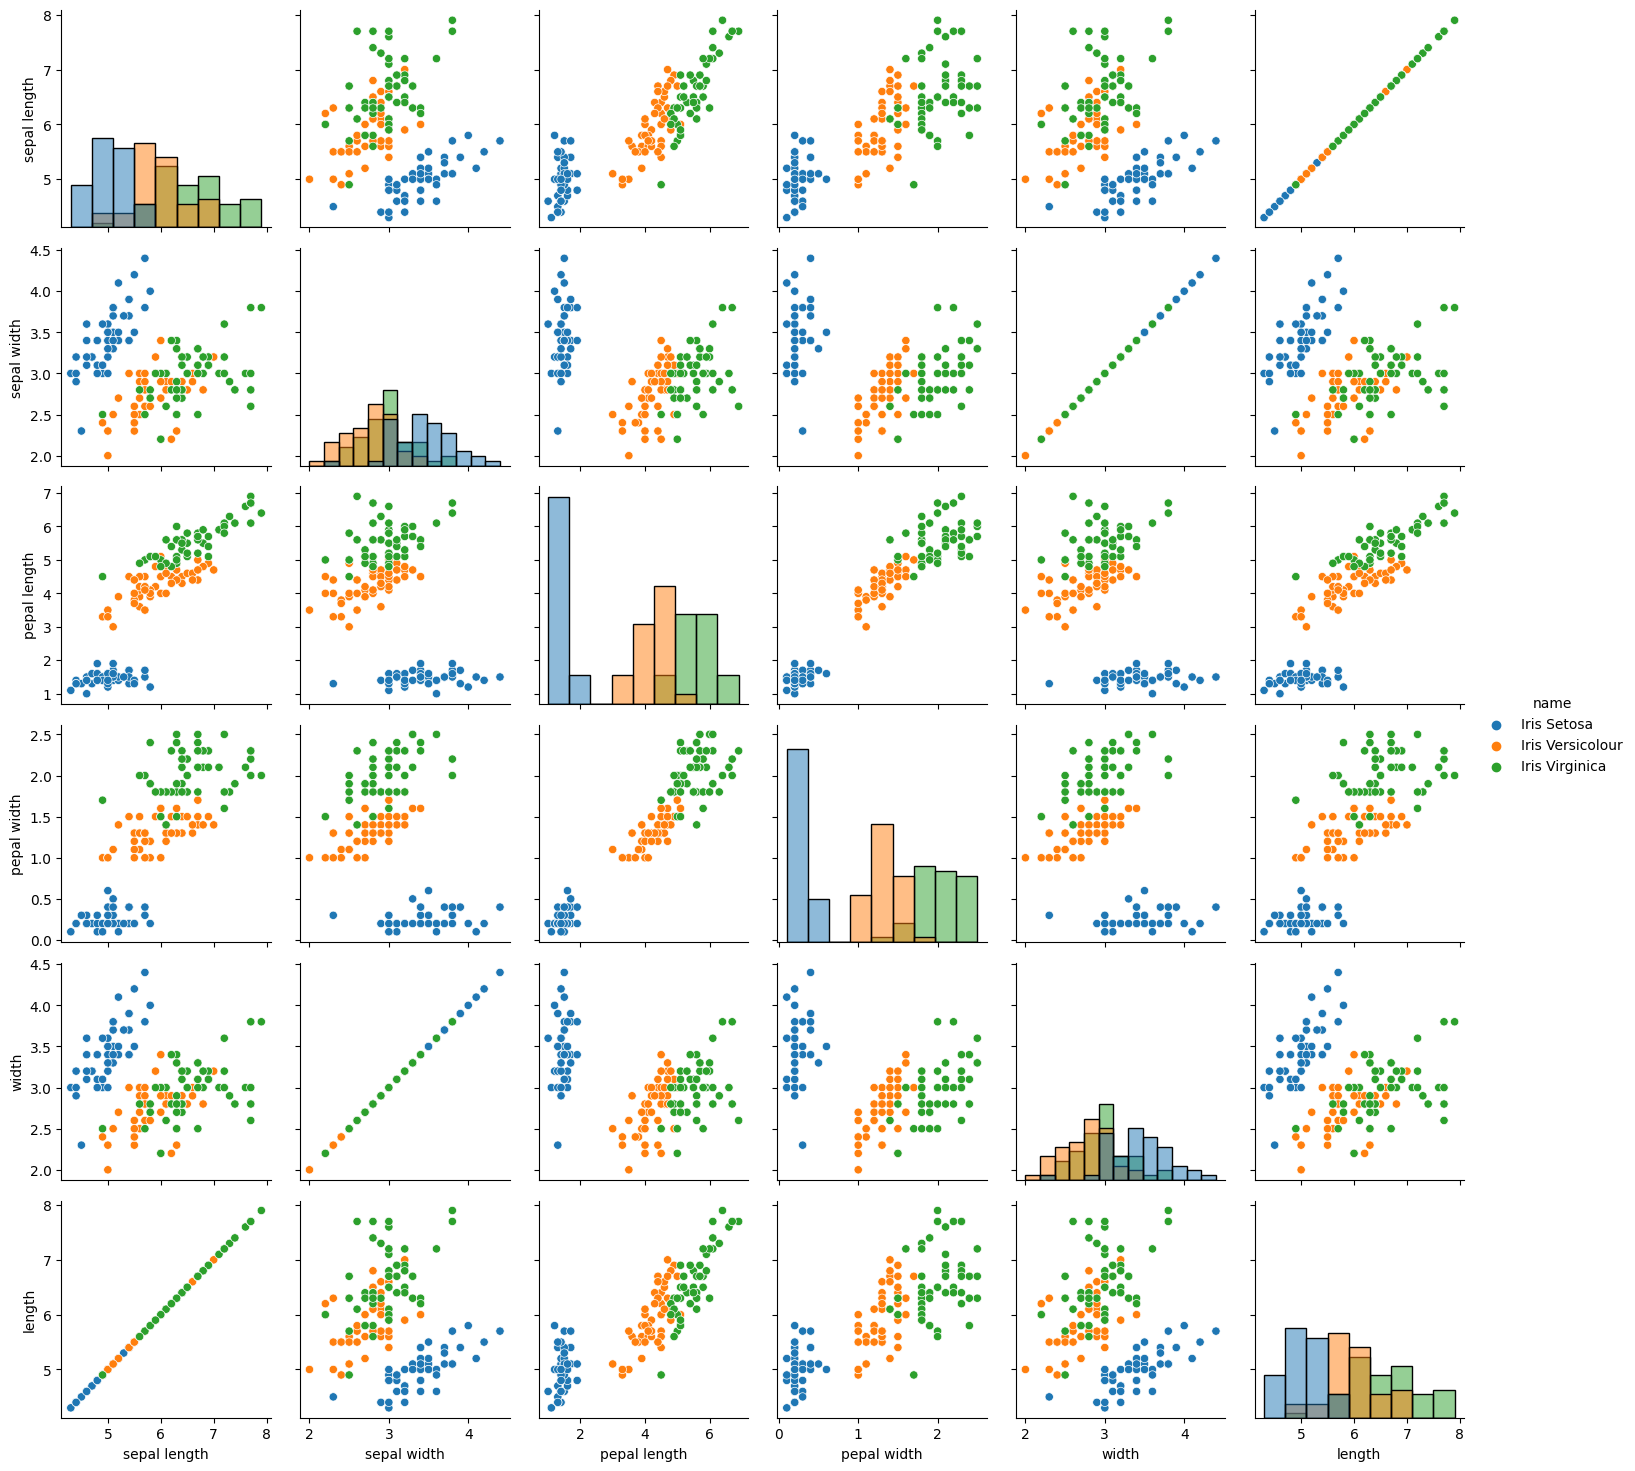

In [10]:
iris_df2 = iris_df.join(iris_df[['sepal width', 'sepal length']].rename(columns={'sepal length':'length', 'sepal width':'width'}))

g = sns.PairGrid(iris_df2, hue="name")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

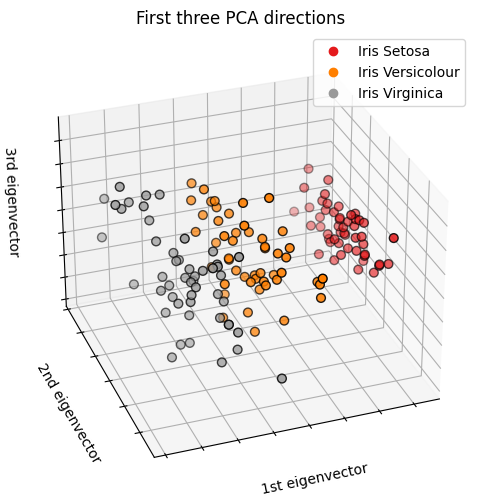

In [49]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1], 
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

#ax.scatter(X_reduced[y == 0, 1], X_reduced[y == 0, 0], color='blue', edgecolor="k", label='Iris Setosa')
#ax.scatter(X_reduced[y == 1, 1], X_reduced[y == 1, 0], color='red', edgecolor="k", label='Iris Versicolour')
#ax.scatter(X_reduced[y == 2, 1], X_reduced[y == 2, 0], color='yellow', edgecolor="k", label='Iris Virginica')

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

labels = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica']
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in numpy.unique(y)]
plt.legend(handles, labels)

plt.show()

In [76]:
import requests

data_glass_raw = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data')

data_glass = ''
for data in (data_glass_raw.iter_content()):
    data_glass = data_glass + data.decode("utf-8") 
data_glass_split = data_glass.split('\n')
data_glass = []
for x in data_glass_split:
    if x != '':
        data_glass.append([float(xx) for xx in x.split(',')])
    

data_glass = numpy.array(data_glass)

target_glass = data_glass[:, 10].astype('int')
data_glass = data_glass[:, 1:10]

dict_glass = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}

In [86]:
PrintAttrData('refractive index', data_glass, 0)    
PrintAttrData('Sodium ', data_glass, 1)    
PrintAttrData('Magnesium ', data_glass, 2)    
PrintAttrData('Aluminum', data_glass, 3)    
PrintAttrData('Silicon', data_glass, 4)    
PrintAttrData('Potassium', data_glass, 5) 
PrintAttrData('Calcium', data_glass, 6)    
PrintAttrData('Barium', data_glass, 7)    
PrintAttrData('Iron', data_glass, 8)    

print('Class distribution: ' + ', '.join(['{} {}'.format(dict_glass[i], len(target_glass[target_glass == i])) for i in dict_glass]))


refractive index: min 1.51, mode 1.5159, mean 1.52, median 1.52, max 1.53, count 214.00, NaN count 0.00
Sodium : min 10.73, mode 13.0, mean 13.41, median 13.30, max 17.38, count 214.00, NaN count 0.00
Magnesium : min 0.00, mode 0.0, mean 2.68, median 3.48, max 4.49, count 214.00, NaN count 0.00
Aluminum: min 0.29, mode 1.54, mean 1.44, median 1.36, max 3.50, count 214.00, NaN count 0.00
Silicon: min 69.81, mode 72.86, mean 72.65, median 72.79, max 75.41, count 214.00, NaN count 0.00
Potassium: min 0.00, mode 0.0, mean 0.50, median 0.56, max 6.21, count 214.00, NaN count 0.00
Calcium: min 5.43, mode 8.03, mean 8.96, median 8.60, max 16.19, count 214.00, NaN count 0.00
Barium: min 0.00, mode 0.0, mean 0.18, median 0.00, max 3.15, count 214.00, NaN count 0.00
Iron: min 0.00, mode 0.0, mean 0.06, median 0.00, max 0.51, count 214.00, NaN count 0.00
Class distribution: building_windows_float_processed 70, building_windows_non_float_processed 76, vehicle_windows_float_processed 17, vehicle_wi

([], [])

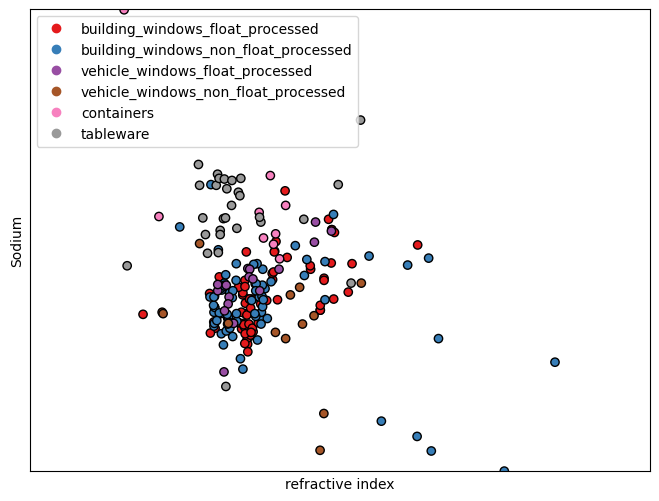

In [112]:
attr1 = 0
attr2 = 1

x_min, x_max = data_glass[:, attr1].min() - 0.005, data_glass[:, attr1].max() + 0.005
y_min, y_max = data_glass[:, attr2].min() - 0.005, data_glass[:, attr2].max() + 0.005

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
scatter_glass = plt.scatter(data_glass[:, attr1], data_glass[:, attr2], c=target_glass, cmap=plt.cm.Set1, edgecolor="k")

labels = [dict_glass[i] for i in dict_glass]
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter_glass.cmap(scatter_glass.norm(yi))) for yi in numpy.unique(target_glass)]

plt.xlabel('refractive index')
plt.ylabel('Sodium')
plt.legend(handles, labels)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [109]:
glass_df = pd.DataFrame(data_glass, columns=['refractive index', 'Sodium', 'Magnesium', 'Aluminum', 'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron'])
glassnm_df = pd.DataFrame(target_glass, columns=['name'])
for i in dict_glass:
    glassnm_df[glassnm_df == i] = dict_glass[i]
    
glass_df = glass_df.join(glassnm_df)
print(glass_df)

     refractive index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0             1.52101   13.64       4.49      1.10    71.78       0.06   
1             1.51761   13.89       3.60      1.36    72.73       0.48   
2             1.51618   13.53       3.55      1.54    72.99       0.39   
3             1.51766   13.21       3.69      1.29    72.61       0.57   
4             1.51742   13.27       3.62      1.24    73.08       0.55   
..                ...     ...        ...       ...      ...        ...   
209           1.51623   14.14       0.00      2.88    72.61       0.08   
210           1.51685   14.92       0.00      1.99    73.06       0.00   
211           1.52065   14.36       0.00      2.02    73.42       0.00   
212           1.51651   14.38       0.00      1.94    73.61       0.00   
213           1.51711   14.23       0.00      2.08    73.36       0.00   

     Calcium  Barium  Iron                              name  
0       8.75    0.00   0.0  building_windows_flo

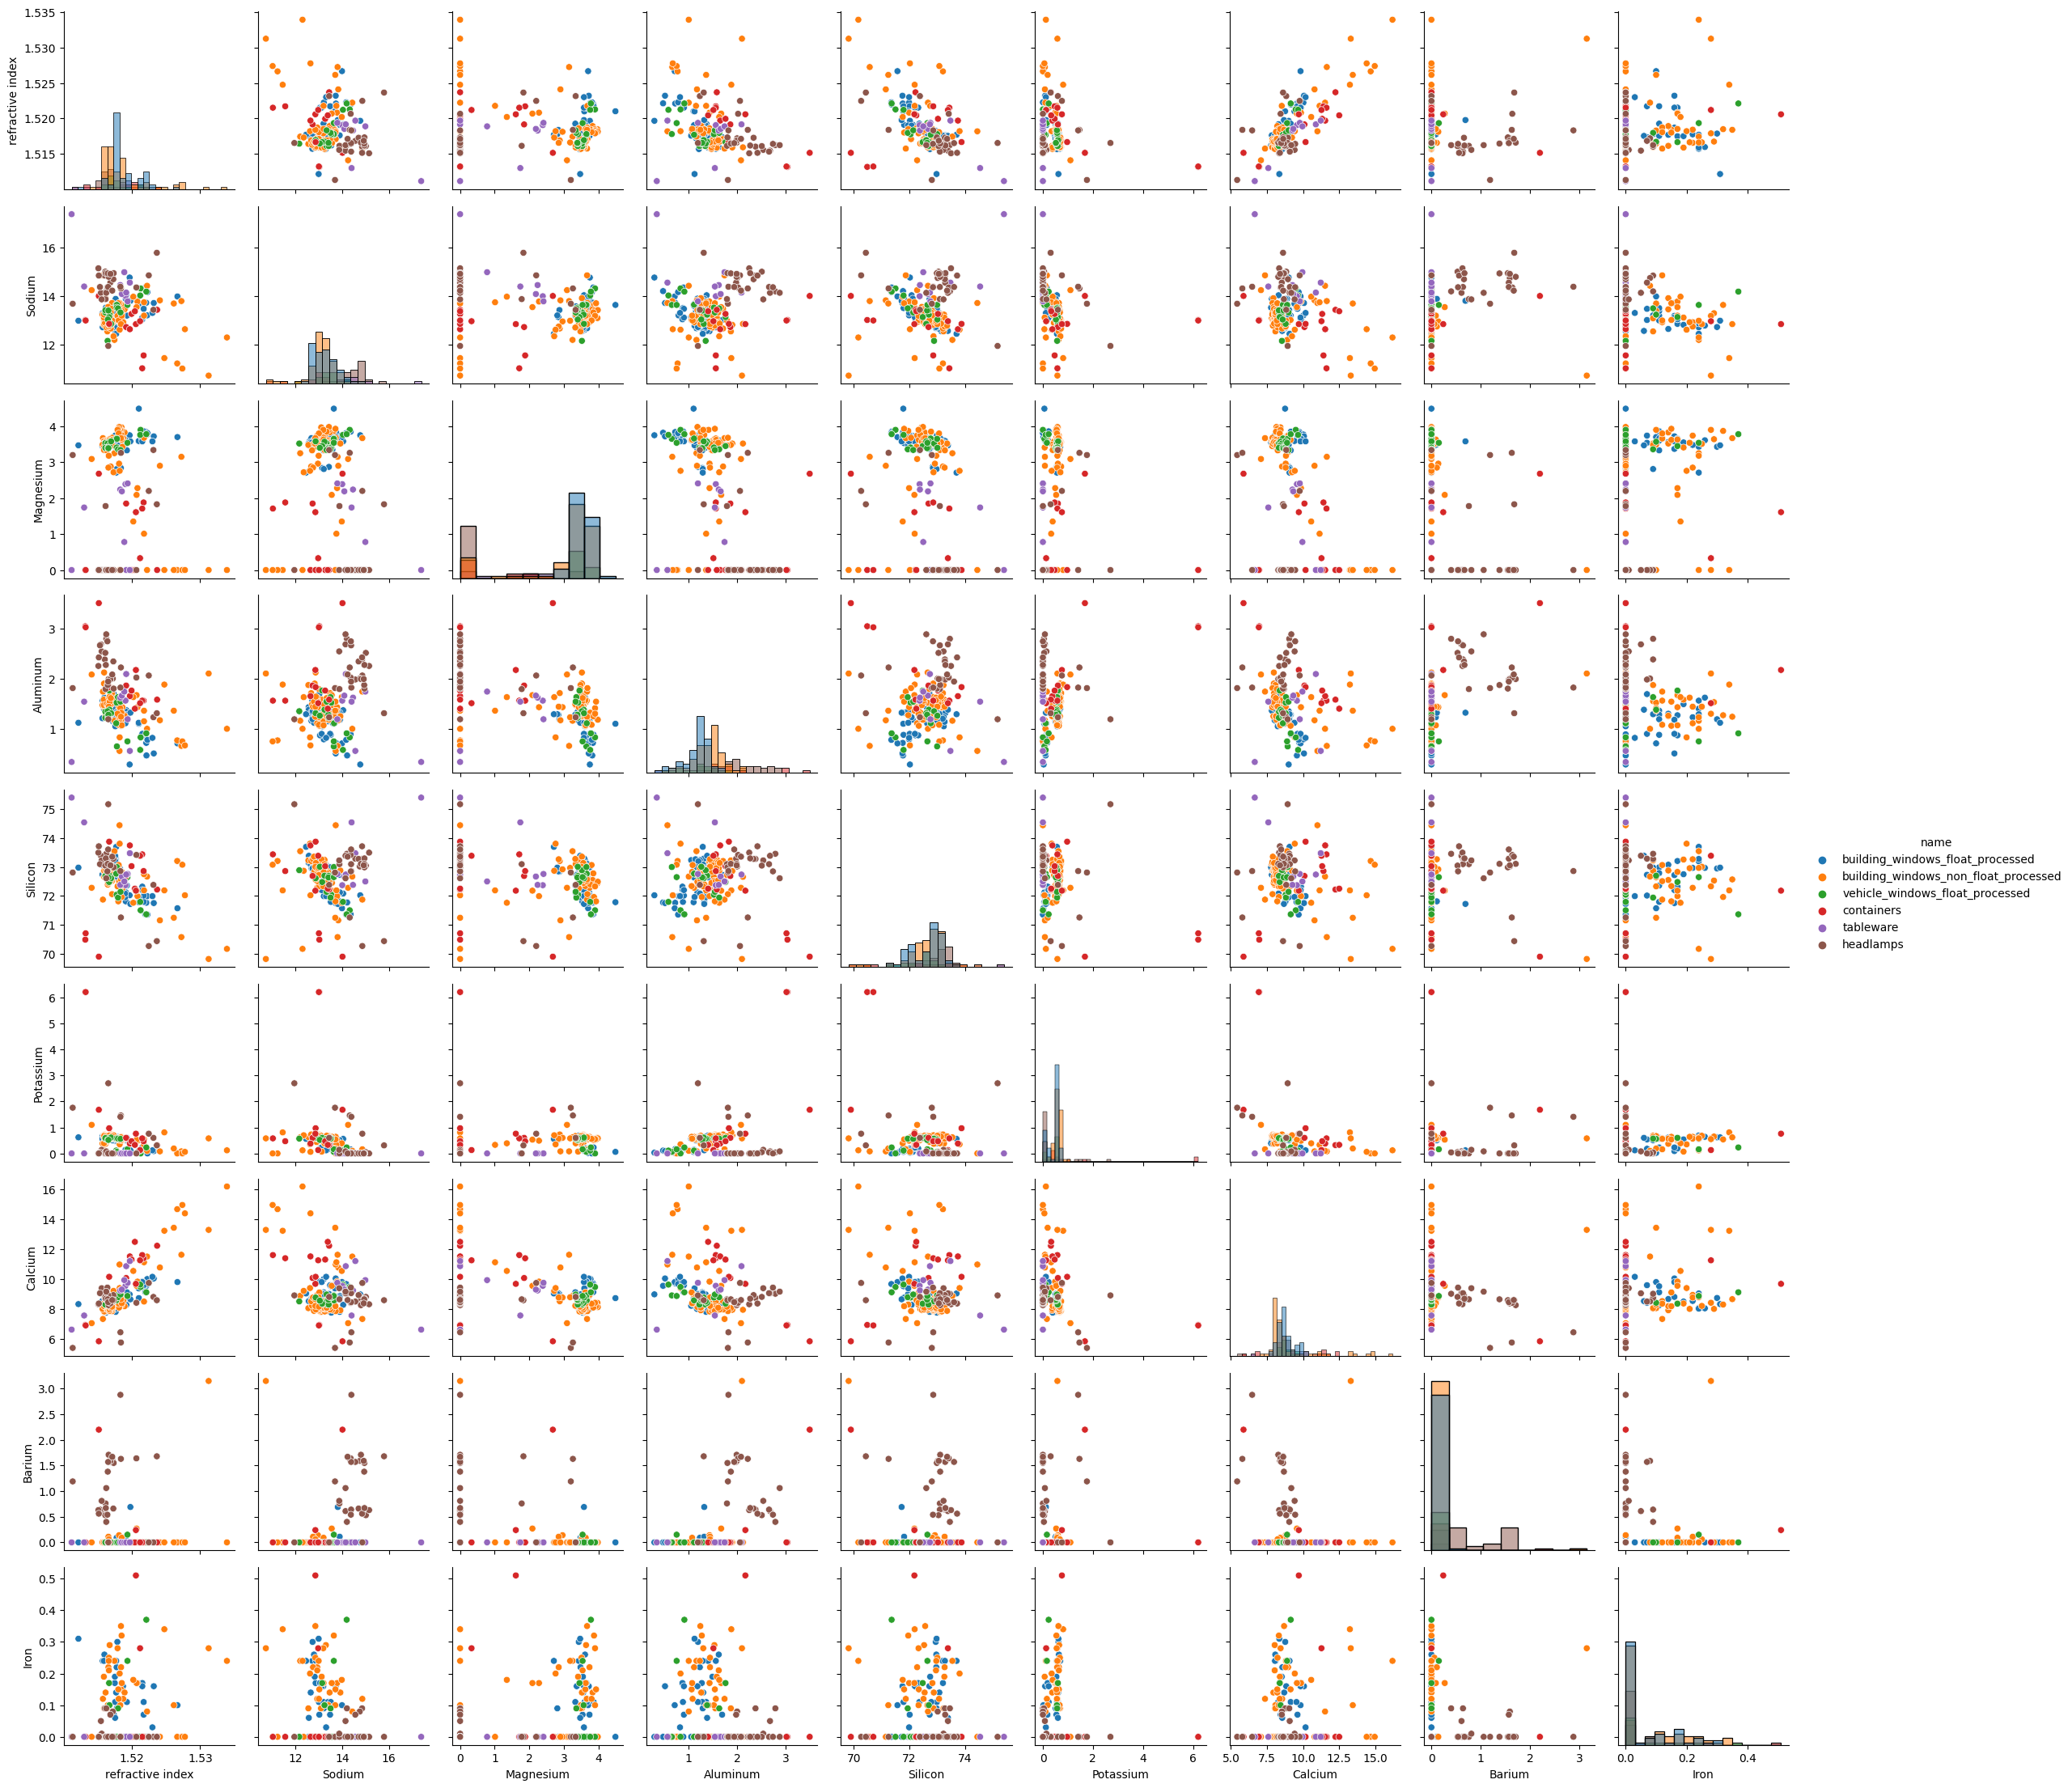

In [110]:
g = sns.PairGrid(glass_df, hue="name")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

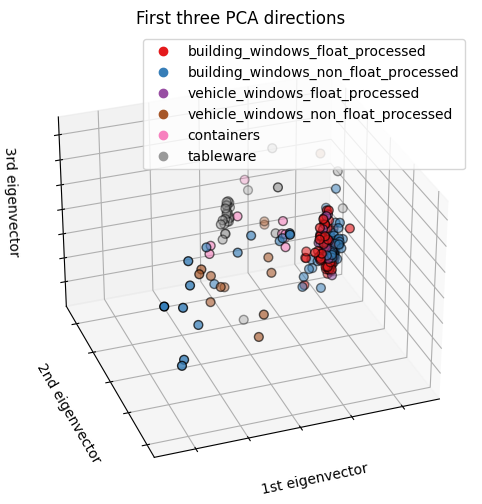

In [113]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(data_glass)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1], 
    X_reduced[:, 2],
    c=target_glass,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

#ax.scatter(X_reduced[y == 0, 1], X_reduced[y == 0, 0], color='blue', edgecolor="k", label='Iris Setosa')
#ax.scatter(X_reduced[y == 1, 1], X_reduced[y == 1, 0], color='red', edgecolor="k", label='Iris Versicolour')
#ax.scatter(X_reduced[y == 2, 1], X_reduced[y == 2, 0], color='yellow', edgecolor="k", label='Iris Virginica')

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

labels = [dict_glass[i] for i in dict_glass]
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter_glass.cmap(scatter_glass.norm(yi))) for yi in numpy.unique(target_glass)]

plt.legend(handles, labels)

plt.show()

In [124]:
wine = datasets.load_wine()
data_wine = wine.data
target_wine = wine.target

dict_target_wine = {
    0: 'class 1',
    1: 'class 2',
    2: 'class 3'
}

dict_attr_wine = {
    0 : 'Alcohol',
    1 : 'Malic acid',
    2 : 'Ash',
    3 : 'Alcalinity of ash' ,
    4 : 'Magnesium',
    5 : 'Total phenols',
    6 : 'Flavanoids',
    7 : 'Nonflavanoid phenols',
    8 : 'Proanthocyanins',
    9 : 'Color intensity',
    10: 'Hue',
    11: 'OD280/OD315 of diluted wines',
    12: 'Proline'
}

In [126]:
for i in dict_attr_wine:
    PrintAttrData(dict_attr_wine[i], data_wine, i) 

print('Class distribution: ' + ', '.join(['{} {}'.format(dict_target_wine[i], len(target_wine[target_wine == i])) for i in dict_target_wine]))


Alcohol: min 11.03, mode 12.37, mean 13.00, median 13.05, max 14.83, count 178.00, NaN count 0.00
Malic acid: min 0.74, mode 1.73, mean 2.34, median 1.87, max 5.80, count 178.00, NaN count 0.00
Ash: min 1.36, mode 2.28, mean 2.37, median 2.36, max 3.23, count 178.00, NaN count 0.00
Alcalinity of ash: min 10.60, mode 20.0, mean 19.49, median 19.50, max 30.00, count 178.00, NaN count 0.00
Magnesium: min 70.00, mode 88.0, mean 99.74, median 98.00, max 162.00, count 178.00, NaN count 0.00
Total phenols: min 0.98, mode 2.2, mean 2.30, median 2.35, max 3.88, count 178.00, NaN count 0.00
Flavanoids: min 0.34, mode 2.65, mean 2.03, median 2.13, max 5.08, count 178.00, NaN count 0.00
Nonflavanoid phenols: min 0.13, mode 0.26, mean 0.36, median 0.34, max 0.66, count 178.00, NaN count 0.00
Proanthocyanins: min 0.41, mode 1.35, mean 1.59, median 1.56, max 3.58, count 178.00, NaN count 0.00
Color intensity: min 1.28, mode 2.6, mean 5.06, median 4.69, max 13.00, count 178.00, NaN count 0.00
Hue: min

([], [])

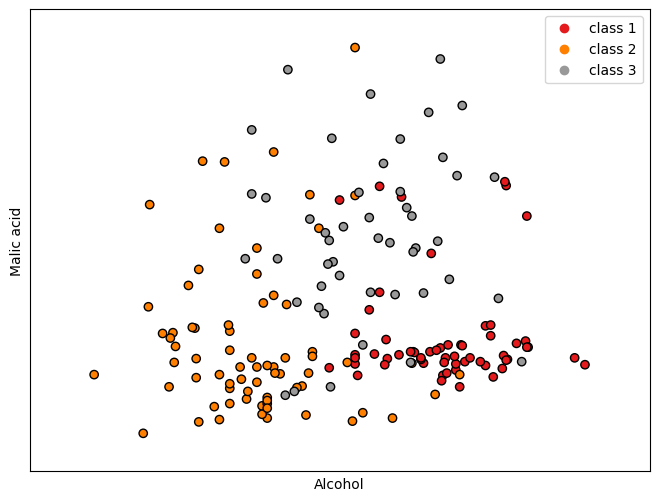

In [129]:
attr1 = 0
attr2 = 1

x_min, x_max = data_wine[:, attr1].min() - 0.5, data_wine[:, attr1].max() + 0.5
y_min, y_max = data_wine[:, attr2].min() - 0.5, data_wine[:, attr2].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
scatter_wine = plt.scatter(data_wine[:, attr1], data_wine[:, attr2], c=target_wine, cmap=plt.cm.Set1, edgecolor="k")

labels = [dict_target_wine[i] for i in dict_target_wine]
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter_wine.cmap(scatter_wine.norm(yi))) for yi in numpy.unique(target_wine)]

plt.xlabel(dict_attr_wine[attr1])
plt.ylabel(dict_attr_wine[attr2])
plt.legend(handles, labels)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [133]:
wine_df = pd.DataFrame(data_wine, columns=[dict_attr_wine[i] for i in dict_attr_wine])
winenm_df = pd.DataFrame(target_wine, columns=['name'])
winenm_df[winenm_df == 0] = dict_target_wine[0]
winenm_df[winenm_df == 1] = dict_target_wine[1]
winenm_df[winenm_df == 2] = dict_target_wine[2]
wine_df = wine_df.join(winenm_df)
print(wine_df)

     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyan

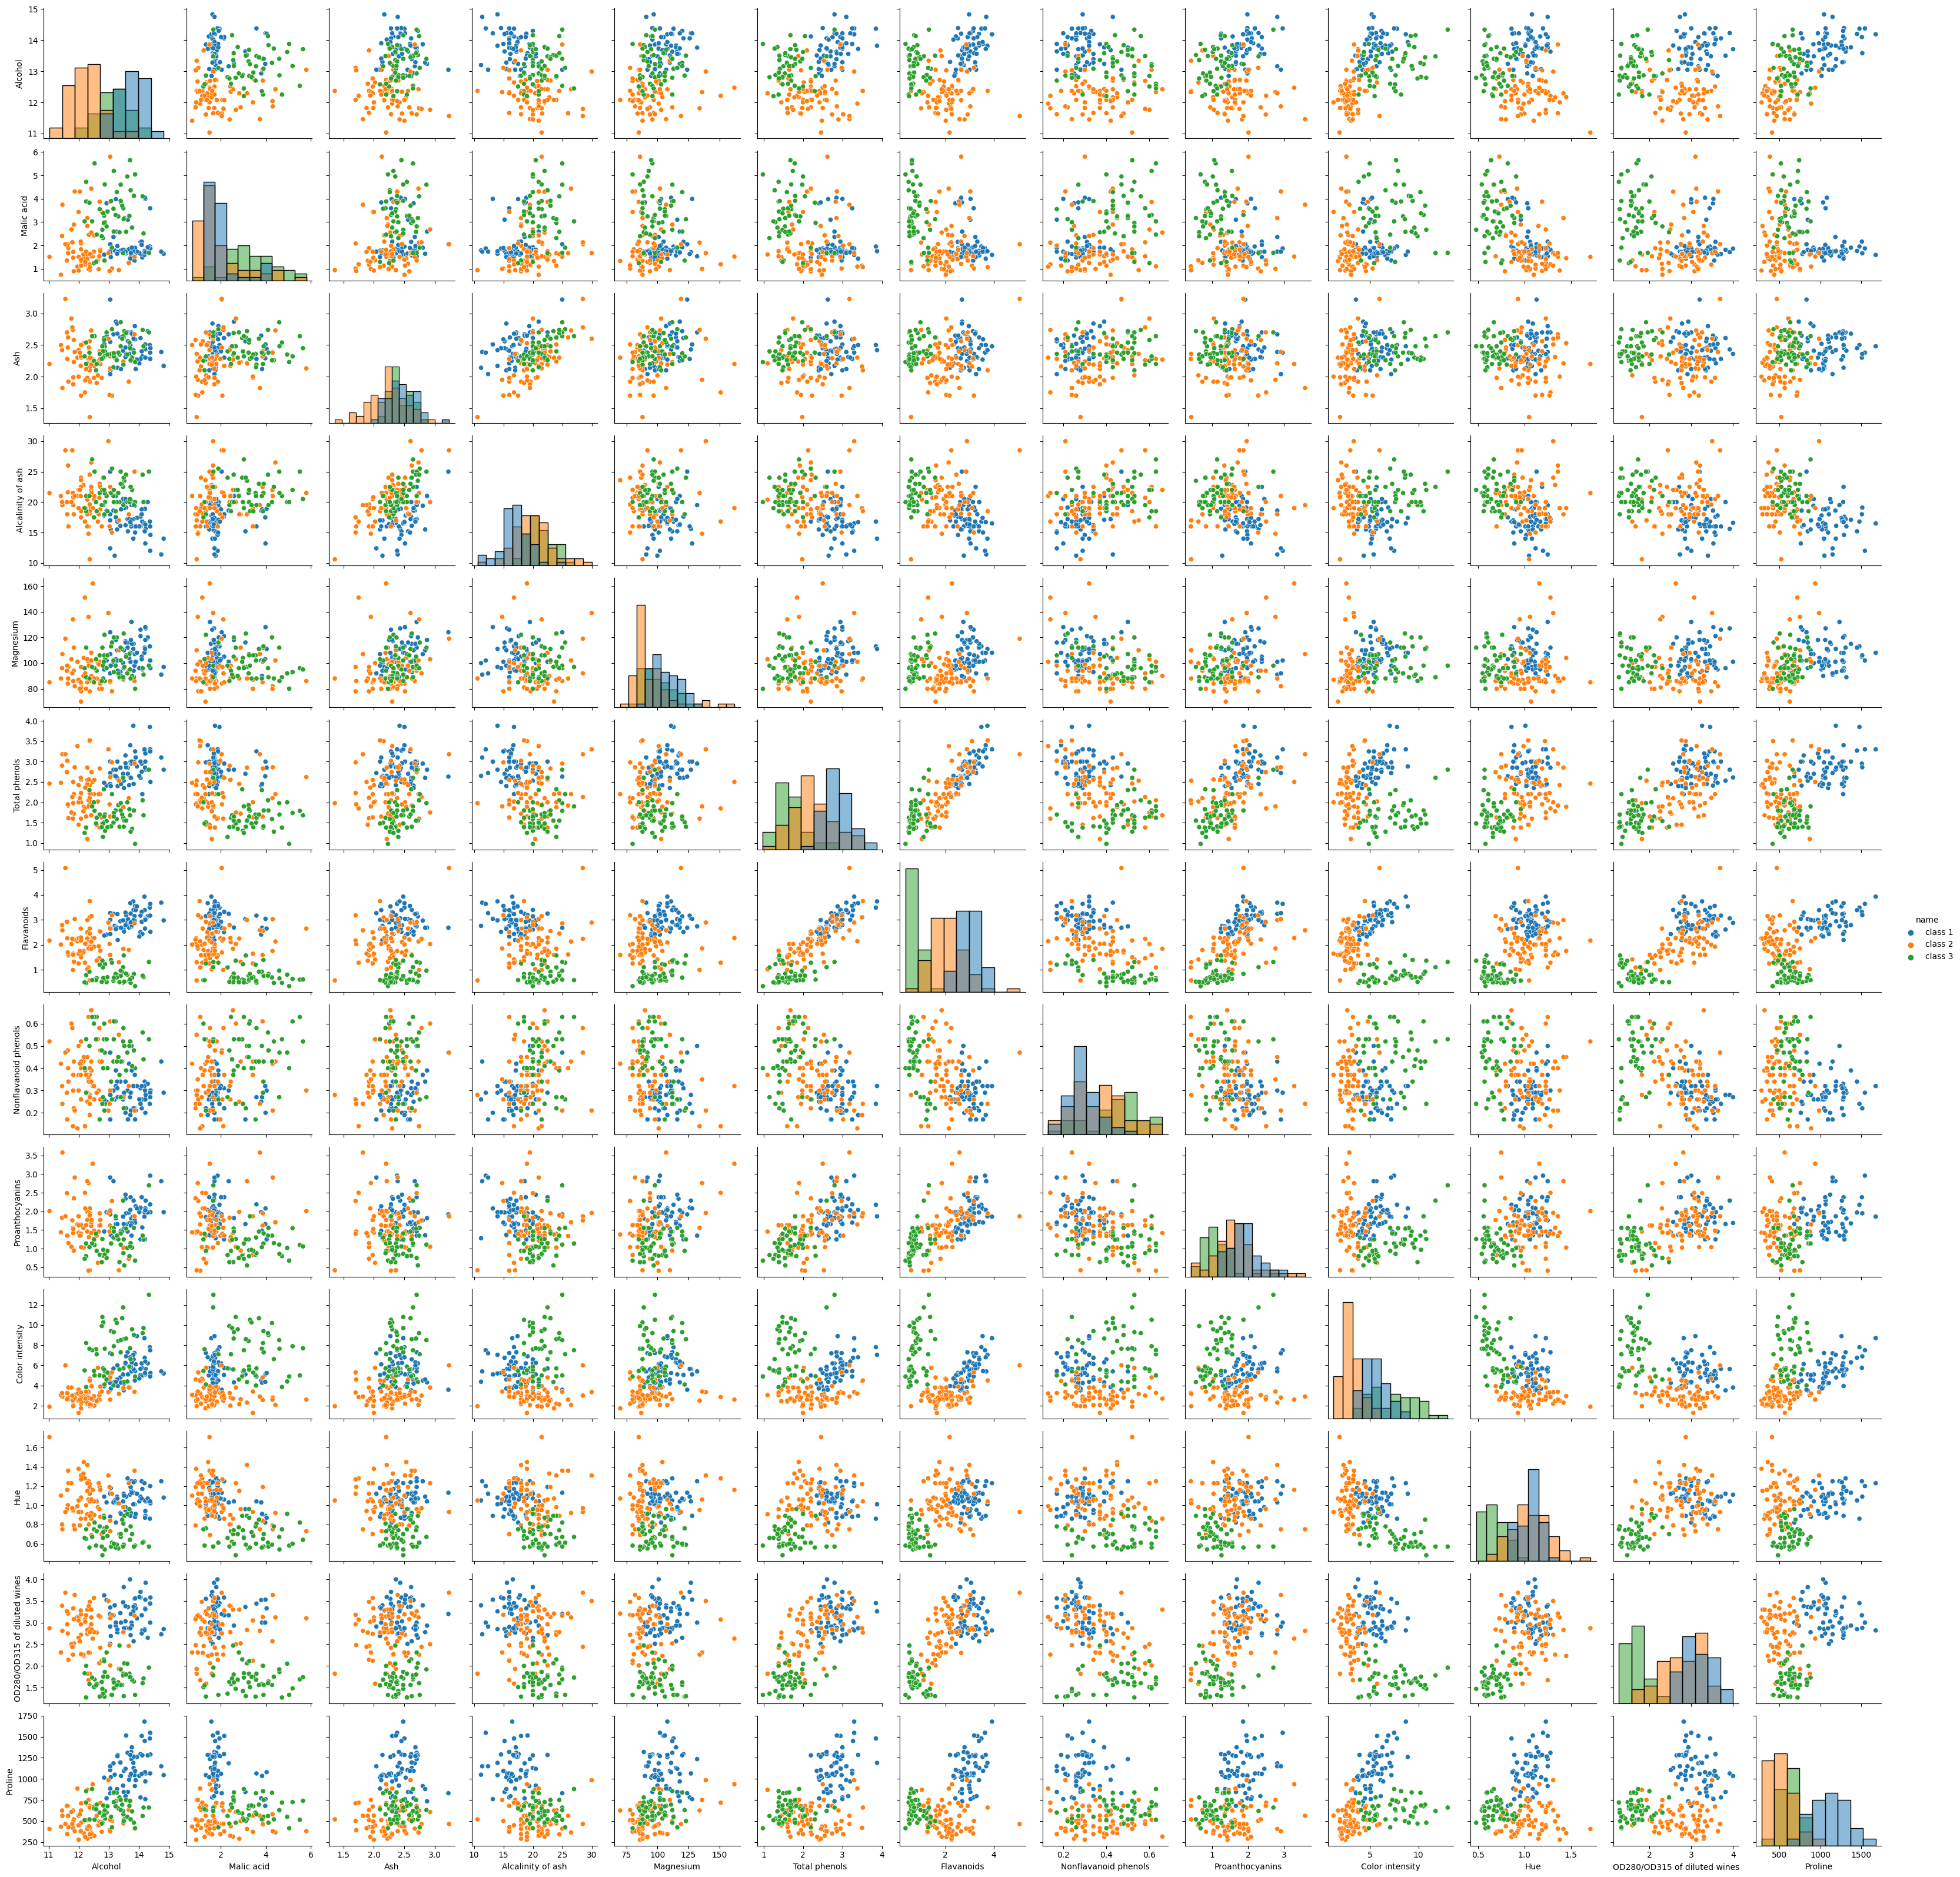

In [135]:
g = sns.PairGrid(wine_df, hue="name")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

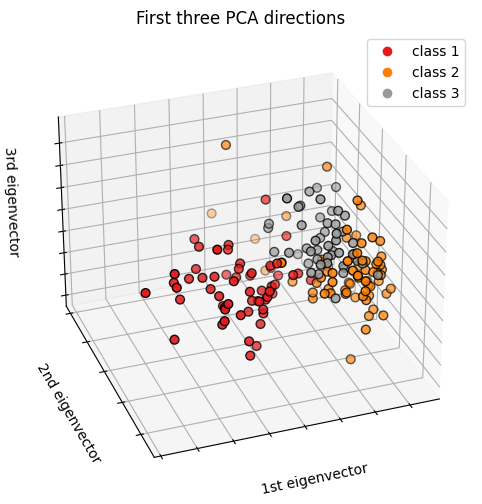

In [136]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(data_wine)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1], 
    X_reduced[:, 2],
    c=target_wine,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

#ax.scatter(X_reduced[y == 0, 1], X_reduced[y == 0, 0], color='blue', edgecolor="k", label='Iris Setosa')
#ax.scatter(X_reduced[y == 1, 1], X_reduced[y == 1, 0], color='red', edgecolor="k", label='Iris Versicolour')
#ax.scatter(X_reduced[y == 2, 1], X_reduced[y == 2, 0], color='yellow', edgecolor="k", label='Iris Virginica')

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

labels = [dict_target_wine[i] for i in dict_target_wine]
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter_glass.cmap(scatter_glass.norm(yi))) for yi in numpy.unique(target_wine)]

plt.legend(handles, labels)

plt.show()